From 이수안 컴퓨터: http://suanlab.com/youtube/ml.html <br>
참고: https://m.blog.naver.com/gdpresent/221703566189

# 로지스틱 회귀 (Logistic Regression)

* 로지스틱 회귀는 이름에 회귀라는 단어가 들어가지만, 가능한 클래스가 2개인 이진 분류를 위한 모델
* 로지스틱 회귀의 예측 함수 정의

\begin{equation}
\sigma(x) = \frac{1}{1 + e^{-x}} \\
\hat{y} = \sigma(w_0 + w_1 x_1 + ... + w_p x_p)
\end{equation}

  + $\sigma$: 시그모이드 함수
  
* 로지스틱 회귀 모델은 선형 회귀 모델에 시그모이드 함수를 적용

* 로지스틱 회귀의 학습 목표는 다음과 같은 목적 함수를 최소화 하는 파라미터 $w$를 찾는 것

\begin{equation}
BinaryCrossEntropy = -\frac{1}{N}\sum_{i=1}^{N}y_i\log(\hat{y}_i) + (1-y_i)\log(1-\hat{y}_i)
\end{equation}

## 로지스틱 회귀 예제

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression

plt.style.use(['seaborn-whitegrid'])

In [2]:
seed = 2022
np.random.seed(seed)

In [3]:
samples = 1000
X, y = make_classification(n_samples=samples, n_features=2, n_informative=2, n_redundant=0,
                          n_clusters_per_class=1)

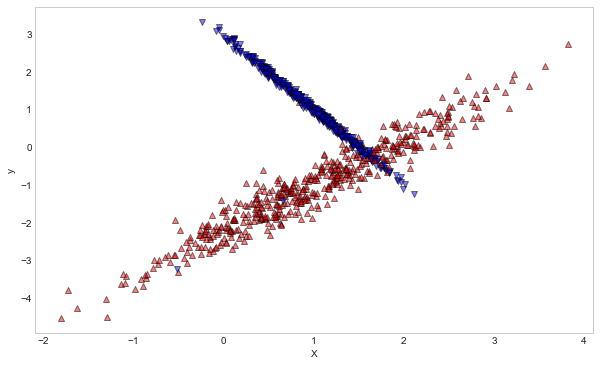

In [4]:
fig, ax = plt.subplots(1,1, figsize=(10,6))
ax.grid()
ax.set_xlabel('X')
ax.set_ylabel('y')

for i in range(samples):
    if y[i] == 0:
        ax.scatter(X[i,0], X[i,1], edgecolors='k', alpha=0.5, marker='^', color='r')
    else:
        ax.scatter(X[i,0], X[i,1], edgecolors='k', alpha=0.5, marker='v', color='b')
             

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=seed)

In [6]:
model = None
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [7]:
print("학습 데이터 점수: {}".format(model.score(X_train, y_train)))
print("평가 데이터 점수: {}".format(model.score(X_test, y_test)))

학습 데이터 점수: 0.89
평가 데이터 점수: 0.86


In [8]:
scores = cross_val_score(model, X, y, cv=10, scoring='accuracy')
print("CV 점수: {}".format(scores))
print("CV 평균 점수: {}".format(scores.mean()))

CV 점수: [0.95 0.88 0.84 0.88 0.9  0.89 0.92 0.85 0.86 0.89]
CV 평균 점수: 0.8859999999999999


In [9]:
model.coef_, model.intercept_

(array([[-2.42833442,  2.95126373]]), array([3.20100091]))

In [10]:
x_min, x_max = X[:,0].min() - 0.5, X[:,0].max() + 0.5
y_min, y_max = X[:,1].min() - 0.5, X[:,1].max() + 0.5
noc = 0.02 # 분류 ㅔlot에서 바탕 구분 화면 정밀도에 사용. 클수록 경계화면이 계단식으로 구분
xx, yy = np.meshgrid(np.arange(x_min, x_max, noc), np.arange(y_min, y_max, noc))

In [11]:
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

C:\Users\User\AppData\Local\Temp\ipykernel_48480\2179120426.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)


(array([-6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

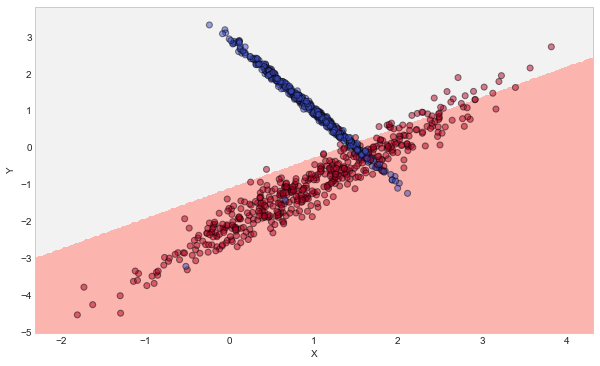

In [12]:
plt.figure(figsize=(10,6))
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Pastel1)
plt.scatter(X[:,0], X[:,1], c=np.abs(y-1), edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.xlabel('X')
plt.ylabel('Y')

plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks()
plt.yticks()

## 붓꽃 데이터

![iris.png](https://drive.google.com/uc?id=1M-rZSCsgOylvAq82HwPdmn2MikZeDQ9a)

In [13]:
from sklearn.datasets import load_iris

In [14]:
iris = load_iris()
print(iris.keys())
print(iris.DESCR)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1

In [15]:
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

In [16]:
iris_df['species'] = [iris.target_names[i] for i in iris.target]
'''
species = pd.Series(iris.target, dtype='category')
species = species.cat.rename_categories(iris.target_names)
iris_df['species'] = species
'''
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


<AxesSubplot:>

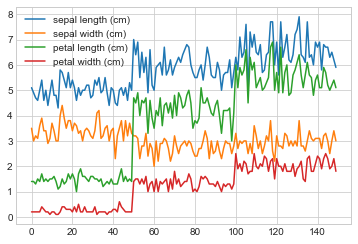

In [17]:
iris_df.plot()

In [18]:
iris_df = iris_df.sample(frac=1).reset_index(drop=True)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,2.5,3.0,1.1,versicolor
1,4.8,3.0,1.4,0.1,setosa
2,7.9,3.8,6.4,2.0,virginica
3,5.2,3.4,1.4,0.2,setosa
4,5.8,2.7,3.9,1.2,versicolor


In [19]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [20]:
iris_df.describe(include='all')

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


In [21]:
iris_df.describe(include=['number','object']) # all 과 동일 default='number'

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,versicolor
freq,NaN,NaN,NaN,NaN,50
mean,5.843333,3.057333,3.758000,1.199333,NaN
std,0.828066,0.435866,1.765298,0.762238,NaN
min,4.300000,2.000000,1.000000,0.100000,NaN
25%,5.100000,2.800000,1.600000,0.300000,NaN
50%,5.800000,3.000000,4.350000,1.300000,NaN
75%,6.400000,3.300000,5.100000,1.800000,NaN


<AxesSubplot:>

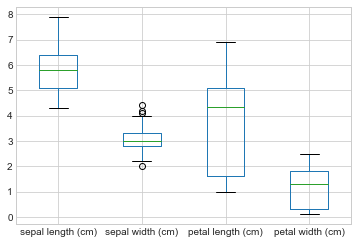

In [22]:
iris_df.boxplot()  # outliner는 원으로 표시됨.

<AxesSubplot:>

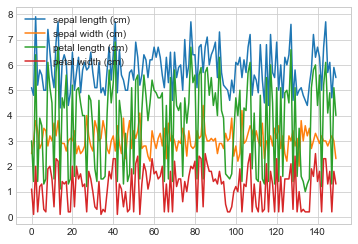

In [23]:
iris_df.plot()

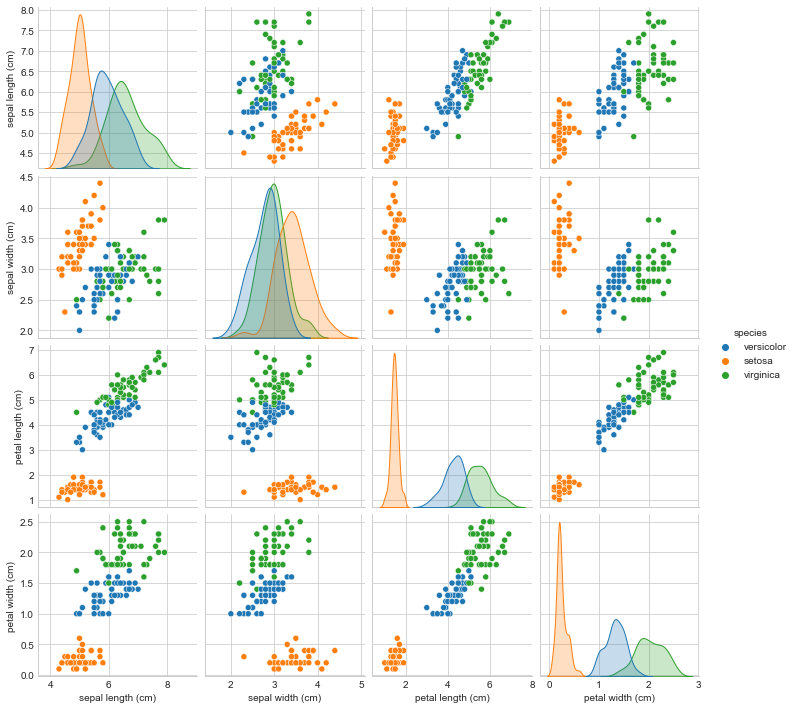

In [24]:
sns.pairplot(iris_df, hue='species')

## 붓꽃 데이터에 대한 로지스틱 회귀

In [85]:
from sklearn.model_selection import train_test_split

In [86]:
iris = load_iris()

In [101]:
X_train, X_test, y_train, y_test = train_test_split(iris.data[:, [2, 3]], iris.target, 
                                                    test_size=0.2, random_state=seed,
                                                    stratify=iris.target)

In [102]:
X = np.vstack((X_train, X_test))
y = np.hstack((y_train, y_test))

In [103]:
from sklearn.linear_model import LogisticRegression

In [104]:
model = None
model = LogisticRegression(solver='lbfgs', multi_class='auto', C=100.0, random_state=seed)
model.fit(X_train, y_train)

LogisticRegression(C=100.0, random_state=2022)

In [105]:
print('학습 데이터 점수: {}'.format(model.score(X_train, y_train)))
print('평가 데이터 점수: {}'.format(model.score(X_test, y_test)))

학습 데이터 점수: 0.9833333333333333
평가 데이터 점수: 0.9333333333333333


In [106]:
x1_min, x1_max = X[:,0].min()-1, X[:,0].max()+1
x2_min, x2_max = X[:,1].min()-1, X[:,1].max()+1
noc = 1 # 분류 ㅔlot에서 바탕 구분 화면 정밀도에 사용. 클수록 경계화면이 계단식으로 구분
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, noc),
                       np.arange(x2_min, x2_max, noc))

In [108]:
Z = model.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
Z = Z.reshape(xx1.shape)

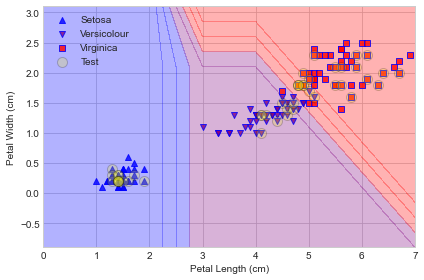

In [118]:
species = ('Setosa', 'Versicolour', 'Virginica')
markers = ('^', 'v', 's')
colors = ('blue', 'purple', 'red')
cmap = ListedColormap(colors[:len(np.unique(y))])
plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
plt.xlim(xx1.min(), xx1.max())
plt.ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(Z)):
    plt.scatter(x=X[y==cl, 0], y=X[y==cl,1], 
                alpha = 0.8, c= colors[idx],
                marker=markers[idx], label=species[cl],
                edgecolor='b')
    
X_comb_test, y_comb_test = X[range(105,150), :], y[range(105,150)]
plt.scatter(X_comb_test[:, 0], X_comb_test[:, 1],
           c='yellow', edgecolor='k', alpha=0.2,
           linewidth=1, marker='o', s=100, label='Test')

plt.xlabel('Petal Length (cm)')
plt.ylabel('Petal Width (cm)')
plt.legend(loc ='upper left')
plt.tight_layout()

In [119]:
import multiprocessing
from sklearn.model_selection import GridSearchCV

param_grid = [{'penalty': ['l1', 'l2'],
              'C': [2.0, 2.2, 2.4, 2.6, 2.8]}]

gs = GridSearchCV(estimator=LogisticRegression(), param_grid=param_grid,
                 scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [120]:
gs

GridSearchCV(cv=10, estimator=LogisticRegression(), n_jobs=4,
             param_grid=[{'C': [2.0, 2.2, 2.4, 2.6, 2.8],
                          'penalty': ['l1', 'l2']}],
             scoring='accuracy')

In [123]:
result = gs.fit(iris.data, iris.target)

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [       nan 0.97333333        nan 0.97333333        nan 0.98
        nan 0.98              nan 0.98      ]
  warnings.warn(
c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [124]:
print(gs.best_estimator_)
print("최적 점수: {}".format(gs.best_score_))
print("최적 파라미터: {}".format(gs.best_params_))
pd.DataFrame(result.cv_results_)

LogisticRegression(C=2.4)
최적 점수: 0.9800000000000001
최적 파라미터: {'C': 2.4, 'penalty': 'l2'}


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_penalty,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.000799,0.000599,0.000000,0.000000,2.0,l1,"{'C': 2.0, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6
1,0.170602,0.029546,0.002299,0.001344,2.0,l2,"{'C': 2.0, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
2,0.000800,0.000871,0.000000,0.000000,2.2,l1,"{'C': 2.2, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7
3,0.198686,0.036440,0.001499,0.001204,2.2,l2,"{'C': 2.2, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,0.933333,0.933333,1.0,1.0,1.0,0.973333,0.032660,4
4,0.000999,0.001482,0.000000,0.000000,2.4,l1,"{'C': 2.4, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
5,0.165105,0.036535,0.001300,0.000458,2.4,l2,"{'C': 2.4, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
6,0.000800,0.000600,0.000000,0.000000,2.6,l1,"{'C': 2.6, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9
7,0.146216,0.022316,0.001999,0.002365,2.6,l2,"{'C': 2.6, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1
8,0.000700,0.000458,0.000000,0.000000,2.8,l1,"{'C': 2.8, 'penalty': 'l1'}",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10
9,0.168503,0.049490,0.001299,0.000458,2.8,l2,"{'C': 2.8, 'penalty': 'l2'}",1.0,0.933333,1.0,1.0,0.933333,1.000000,0.933333,1.0,1.0,1.0,0.980000,0.030551,1


## 유방암 데이터

## 유방암 데이터에 대한 로지스틱 회귀

# 확률적 경사 하강법 (Stochastic Gradient Descent)

* 모델을 학습 시키기 위한 간단한 방법
* 학습 파라미터에 대한 손실 함수의 기울기를 구해 기울기가 최소화 되는 방향으로 학습

\begin{equation}
\frac{\partial L}{\partial w} = \underset{h \rightarrow 0}{lim} \frac{L(w+h) - L(w)}{h} \\
w^{'} = w - \alpha \frac{\partial L}{\partial w}
\end{equation}

* scikit-learn에서는 선형 SGD 회귀와 SGD 분류를 지원

## SGD를 사용한 선형 회귀 분석

## 붓꽃 데이터에 대한 SGD 분류

## 유방암 데이터에 대한 SGD 분류